# es36
## Noemi Baruffolo 5^AROB
### prestiti

In [99]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import  LabelEncoder
from sklearn.tree import  DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier

In [100]:
data = pd.read_csv("csv/loan_train.csv")
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [101]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [102]:
features = ['Gender', 'Married', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area']
target = ["Loan_Status"]

In [103]:
features_Le = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area']
labelEncoders = []
for f in features_Le:
    le = LabelEncoder()
    data[f] = le.fit_transform(data[f])
    labelEncoders.append(le)

In [104]:
useful_data = data[features+target].copy()
useful_data.dropna(inplace = True)
useful_data.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,N
2,1,1,0,1,3000,0.0,66.0,360.0,1.0,2,Y
3,1,1,1,0,2583,2358.0,120.0,360.0,1.0,2,Y
4,1,0,0,0,6000,0.0,141.0,360.0,1.0,2,Y
5,1,1,0,1,5417,4196.0,267.0,360.0,1.0,2,Y


In [105]:
useful_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 529 entries, 1 to 613
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             529 non-null    int32  
 1   Married            529 non-null    int32  
 2   Education          529 non-null    int32  
 3   Self_Employed      529 non-null    int32  
 4   ApplicantIncome    529 non-null    int64  
 5   CoapplicantIncome  529 non-null    float64
 6   LoanAmount         529 non-null    float64
 7   Loan_Amount_Term   529 non-null    float64
 8   Credit_History     529 non-null    float64
 9   Property_Area      529 non-null    int32  
 10  Loan_Status        529 non-null    object 
dtypes: float64(4), int32(5), int64(1), object(1)
memory usage: 39.3+ KB


In [106]:
X = useful_data[features].to_numpy()
y = useful_data[target].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

**Alberi decisionali e random forest non richiedono dati normalizzati!**

In [108]:
score_training = []
score_test = []
max_depth = []

for d in range (1, 20):
    albero = DecisionTreeClassifier(max_depth = d)
    albero.fit(X_train, y_train)
    max_depth.append(d)
    score_training.append(albero.score(X_train, y_train))
    score_test.append(albero.score(X_test, y_test))

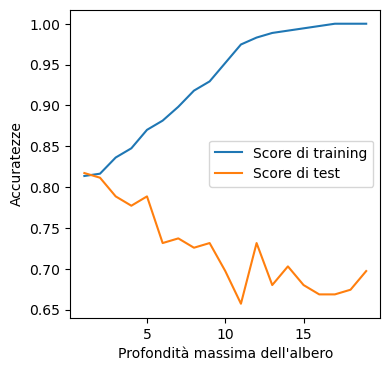

In [109]:
fig, ax =plt.subplots(figsize = (4, 4))
ax.plot(max_depth, score_training, label = "Score di training")
ax.plot(max_depth, score_test, label = "Score di test")
ax.set_xlabel("Profondità massima dell'albero")
ax.set_ylabel("Accuratezze")
ax.legend()
plt.show()

In [110]:
albero = DecisionTreeClassifier(max_depth = 3)

In [111]:
albero.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

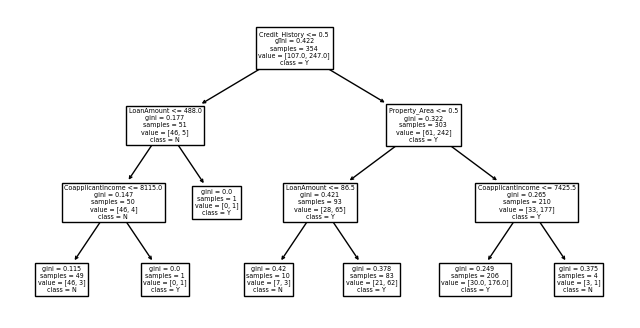

In [112]:
fig, ax = plt.subplots(figsize = (8, 4))
plot_tree(albero, ax = ax, feature_names = features, class_names = albero.classes_)
plt.show()

Visto che fa overfitting noi addestriamo centinaia e migliaia di alberi, cambiando leggermente i campioni che passiamo ad ogni albero e le features

In [114]:
rf = RandomForestClassifier(max_depth = 3, n_estimators = 200)

In [115]:
rf.fit(X_train, y_train)

C:\Users\Utente\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(max_depth=3, n_estimators=200)

In [116]:
rf.score(X_test, y_test)

0.8171428571428572

Va trovata la max_depth più ottimale

In [135]:
rf.feature_importances_

array([0.02234997, 0.01189884, 0.01685022, 0.00958381, 0.07392647,
       0.09158001, 0.09565268, 0.0549558 , 0.55860684, 0.06459536])

In [148]:
print("feature: importance")
print("")
for feature, importance in zip(features, rf.feature_importances_):
    print(f"{feature}: {importance:.3f}")

feature: importance

Gender: 0.022
Married: 0.012
Education: 0.017
Self_Employed: 0.010
ApplicantIncome: 0.074
CoapplicantIncome: 0.092
LoanAmount: 0.096
Loan_Amount_Term: 0.055
Credit_History: 0.559
Property_Area: 0.065


## Esercizio 1
Fare grafico per calcolare max_depth e n_estimators

## Esercizio 2
Addestrare un MLP usando soltanto le 3 feature più importanti.
**NOTA**: occorre normalizzare:

### La verifica sarà su Alberi decisionali, MLP, RandomForest